# Load All Important Libraries

In [1]:
!pip install folium

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu,ttest_ind,f_oneway, kruskal
from sklearn.linear_model import LinearRegression
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import folium
from folium.plugins import MarkerCluster

# Load The Data And Find NA And Missing Values and Duplicates

In [3]:
df = pd.read_csv('Meteorite_Landings.csv')
df

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"


In [4]:
df.describe()

,id,mass (g),year,reclat,reclong
count,45716.000000,4.558500e+04,45425.000000,38401.000000,38401.000000
mean,26889.735104,1.327808e+04,1991.828817,-39.122580,61.074319
std,16860.683030,5.749889e+05,25.052766,46.378511,80.647298
min,1.000000,0.000000e+00,860.000000,-87.366670,-165.433330
25%,12688.750000,7.200000e+00,1987.000000,-76.714240,0.000000
50%,24261.500000,3.260000e+01,1998.000000,-71.500000,35.666670
75%,40656.750000,2.026000e+02,2003.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2101.000000,81.166670,354.473330


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [6]:
print(df.isna())

        name     id  nametype  recclass  mass (g)   fall   year  reclat  \
0      False  False     False     False     False  False  False   False   
1      False  False     False     False     False  False  False   False   
2      False  False     False     False     False  False  False   False   
3      False  False     False     False     False  False  False   False   
4      False  False     False     False     False  False  False   False   
...      ...    ...       ...       ...       ...    ...    ...     ...   
45711  False  False     False     False     False  False  False   False   
45712  False  False     False     False     False  False  False   False   
45713  False  False     False     False     False  False  False   False   
45714  False  False     False     False     False  False  False   False   
45715  False  False     False     False     False  False  False   False   

       reclong  GeoLocation  
0        False        False  
1        False        False  
2        

In [7]:
df.isnull().sum()

name              0
id                0
nametype          0
recclass          0
mass (g)        131
fall              0
year            291
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

In [8]:
df.isna().sum()

name              0
id                0
nametype          0
recclass          0
mass (g)        131
fall              0
year            291
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

In [9]:
na_df = df[df.isna().any(axis=1)]
na_df

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
12,Aire-sur-la-Lys,425,Valid,Unknown,NaN,Fell,1769.0,50.66667,2.33333,"(50.66667, 2.33333)"
37,Northwest Africa 5815,50693,Valid,L5,256.800,Found,NaN,0.00000,0.00000,"(0.0, 0.0)"
38,Angers,2301,Valid,L6,NaN,Fell,1822.0,47.46667,-0.55000,"(47.46667, -0.55)"
76,Barcelona (stone),4944,Valid,OC,NaN,Fell,1704.0,41.36667,2.16667,"(41.36667, 2.16667)"
93,Belville,5009,Valid,OC,NaN,Fell,1937.0,-32.33333,-64.86667,"(-32.33333, -64.86667)"
...,...,...,...,...,...,...,...,...,...,...
45589,Yamato 984028,40648,Valid,Martian (shergottite),12.342,Found,1998.0,NaN,NaN,NaN
45660,Yambo no. 2,30346,Valid,L3,3.200,Found,1975.0,NaN,NaN,NaN
45692,Zacatecas (1969),30382,Valid,"Iron, IIIAB",6660.000,Found,1969.0,NaN,NaN,NaN
45698,Zapata County,30393,Valid,Iron,NaN,Found,1930.0,27.00000,-99.00000,"(27.0, -99.0)"


In [10]:
df = df.dropna()
df

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"


In [11]:
df.isnull().sum()

name           0
id             0
nametype       0
recclass       0
mass (g)       0
fall           0
year           0
reclat         0
reclong        0
GeoLocation    0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
# As we can see we have droped around 7601 rows which was Redundant Data for our Analysis and there are no duplicates so now our data is ready for analysis 

# Plots to find Relationship Between Data

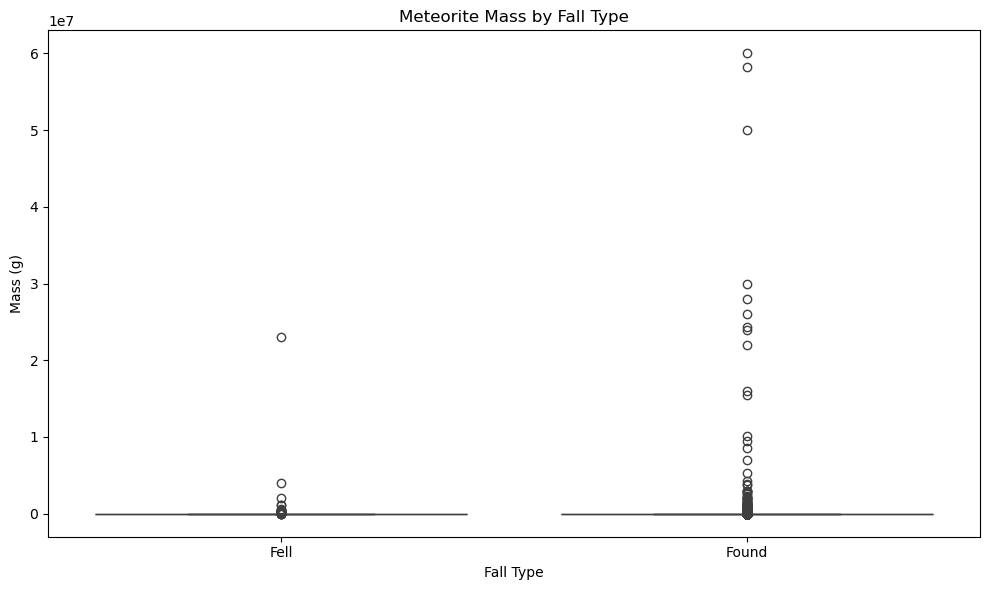

In [13]:
# Plot 2: Mass Distribution by Fall Type (Fell vs Found)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="fall", y="mass (g)")
plt.title("Meteorite Mass by Fall Type")
plt.xlabel("Fall Type")
plt.ylabel("Mass (g)")
plt.tight_layout()
plt.show()

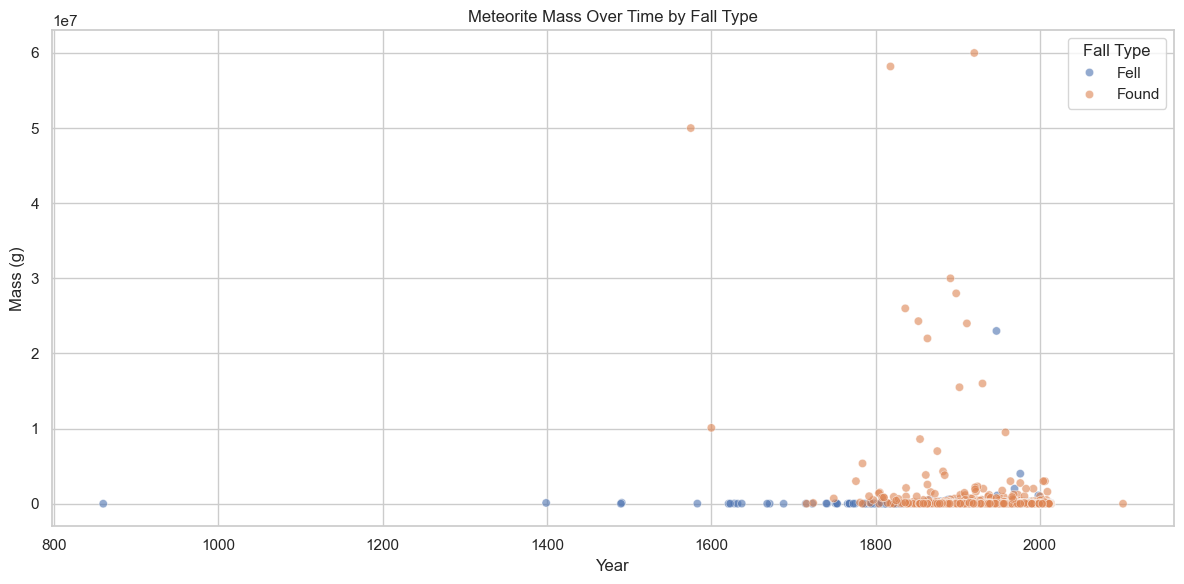

In [14]:
#Mass vs. Year Plot (Heavier Meteorites Over Time)
mass_cap = df["mass (g)"].quantile(0.99)
df_filtered = df[df["mass (g)"] <= mass_cap]

# Set plot style
sns.set(style="whitegrid")

# Plot: Mass vs. Year
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="year", y="mass (g)", hue="fall", alpha=0.6)
plt.title("Meteorite Mass Over Time by Fall Type")
plt.xlabel("Year")
plt.ylabel("Mass (g)")
plt.legend(title="Fall Type")
plt.tight_layout()
plt.show()

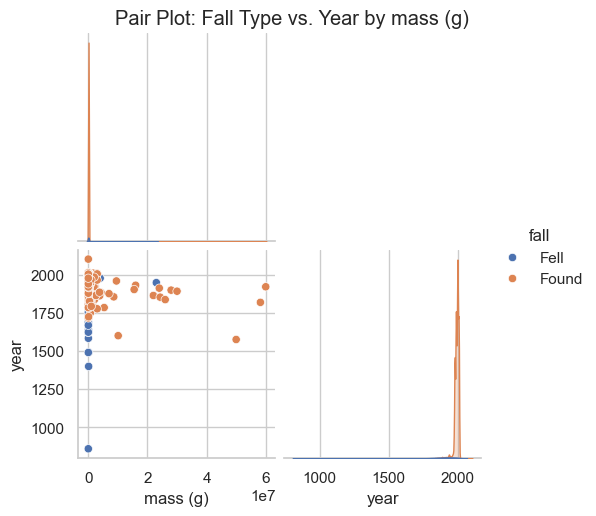

In [15]:
# Subset for pairplot
pairplot_data = df[["mass (g)", "year", "fall"]]

# Create pairplot
sns.pairplot(pairplot_data, hue="fall", diag_kind="kde", corner=True)
plt.suptitle("Pair Plot: Fall Type vs. Year by mass (g) ", y=1.02)
plt.show()

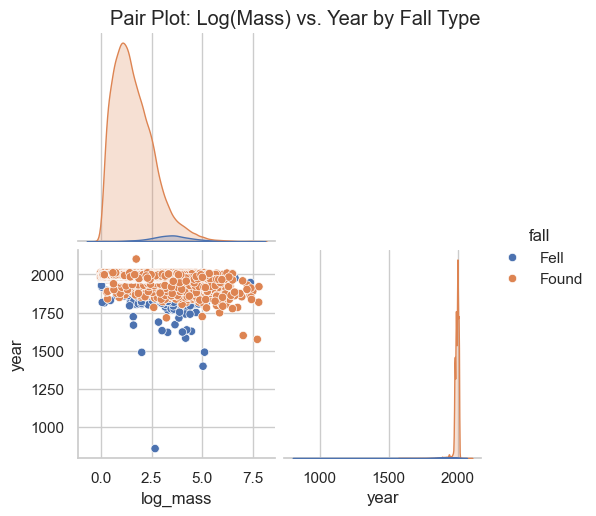

In [16]:
# Subset for pairplot
pairplot_data = df[["mass (g)", "year", "fall"]].dropna()

# Optional: Log-transform mass for better scale (optional)
pairplot_data["log_mass"] = np.log10(pairplot_data["mass (g)"] + 1)

# Create pairplot using 'fall' as hue
sns.pairplot(pairplot_data, vars=["log_mass", "year"], hue="fall", diag_kind="kde", corner=True)
plt.suptitle("Pair Plot: Log(Mass) vs. Year by Fall Type", y=1.02)
plt.show()

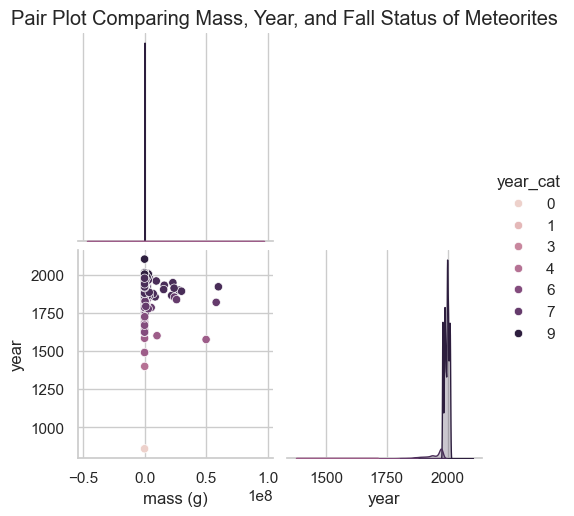

In [17]:
# Subset for pairplot
pairplot_data = df[["mass (g)", "year", "fall"]].copy()

# If year is numeric, you could convert it to categorical like decades
pairplot_data['year_cat'] = pd.cut(pairplot_data['year'], bins=10, labels=False)

# Create pairplot with categorical hue (year_cat) or just 'fall'
sns.pairplot(pairplot_data, hue="year_cat", diag_kind="kde", corner=True)

plt.suptitle("Pair Plot Comparing Mass, Year, and Fall Status of Meteorites", y=1.02)
plt.show()

In [18]:
#so we can see there is some relationship between Fall/found ,Mass(g) and Year But we will confirm that with Hypothesis Testing 

In [19]:
#Graphical Map Of Fallen Meteors

# Hypothesis Testing

# 1) does Meteorites that Fell Have Different Mass From that have Found ?

In [21]:
#Ho = There is No Difference Between mass
#H1 = There is Difference Between mass

# Assuming df is your DataFrame
fell_mass = df.loc[df['fall'] == 'Fell', 'mass (g)'].dropna()
found_mass = df.loc[df['fall'] == 'Found', 'mass (g)'].dropna()

# Optional: log transform if mass is skewed
import numpy as np
fell_mass_log = np.log10(fell_mass + 1)
found_mass_log = np.log10(found_mass + 1)

# 1) Check normality with Shapiro-Wilk test (optional)
from scipy.stats import shapiro
print('Fell normality p:', shapiro(fell_mass_log).pvalue)
print('Found normality p:', shapiro(found_mass_log).pvalue)

# 2) Perform two-sample t-test on log mass if normality holds
t_stat, p_val_ttest = ttest_ind(fell_mass_log, found_mass_log, equal_var=False)
print(f"T-test p-value: {p_val_ttest}")

# 3) Mann-Whitney U test (non-parametric)
u_stat, p_val_mw = mannwhitneyu(fell_mass, found_mass, alternative='two-sided')
print(f"Mann-Whitney U test p-value: {p_val_mw}")

if p_val_mw < 0.05:
    print("Reject null hypothesis \nThere is Difference between mass of found and fall") #groups differ significantly in mass.
else:
    print("Fail to Reject null hypothesis \n therefore there is no Difference between mass of found and fall") #no significant difference.

Fell normality p: 0.0001061709373134041
Found normality p: 2.516850702172507e-78
T-test p-value: 0.0
Mann-Whitney U test p-value: 0.0
Reject null hypothesis 
There is Difference between mass of found and fall


D:\softwares\python\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 37050.
  res = hypotest_fun_out(*samples, **kwds)


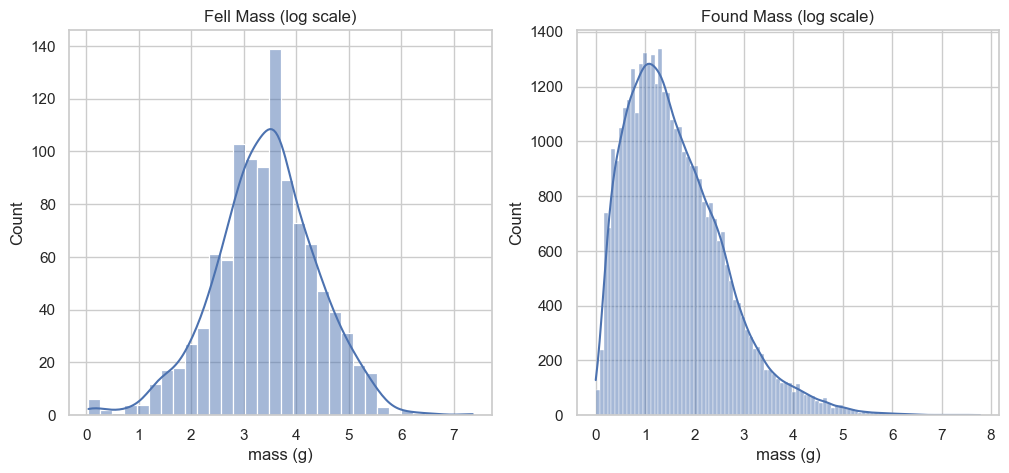

T-test p-value: 0.0
Mann-Whitney U test p-value: 0.0
Reject null hypothesis: There is a difference in mass between 'Fell' and 'Found'.


In [22]:
#Ho = There is No Difference Between mass
#H1 = There is Difference Between mass

fell_mass = df.loc[df['fall'] == 'Fell', 'mass (g)'].dropna()
found_mass = df.loc[df['fall'] == 'Found', 'mass (g)'].dropna()

fell_mass_log = np.log10(fell_mass + 1)
found_mass_log = np.log10(found_mass + 1)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(fell_mass_log, kde=True)
plt.title("Fell Mass (log scale)")

plt.subplot(1,2,2)
sns.histplot(found_mass_log, kde=True)
plt.title("Found Mass (log scale)")
plt.show()
t_stat, p_val_ttest = ttest_ind(fell_mass_log, found_mass_log, equal_var=False)
print(f"T-test p-value: {p_val_ttest}")
u_stat, p_val_mw = mannwhitneyu(fell_mass, found_mass, alternative='two-sided')
print(f"Mann-Whitney U test p-value: {p_val_mw}")


if p_val_mw < 0.05:
    print("Reject null hypothesis: There is a difference in mass between 'Fell' and 'Found'.")
else:
    print("Fail to reject null hypothesis: No significant difference in mass between 'Fell' and 'Found'.")


In [23]:
# Select and clean data
fell_mass = df.loc[df['fall'] == 'Fell', 'mass (g)'].dropna()
found_mass = df.loc[df['fall'] == 'Found', 'mass (g)'].dropna()

# Log-transform the mass (add 1 to avoid log(0))
fell_mass_log = np.log10(fell_mass + 1)
found_mass_log = np.log10(found_mass + 1)

# Perform two-sample t-test (Welch’s t-test, unequal variances)
t_stat, p_value = ttest_ind(fell_mass_log, found_mass_log, equal_var=False)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3e}")

if p_value < 0.05:
    print("Result: Significant difference in mean log-mass between Fell and Found meteorites.")
else:
    print("Result: No significant difference in mean log-mass between Fell and Found meteorites.")


T-statistic: 59.307
P-value: 0.000e+00
Result: Significant difference in mean log-mass between Fell and Found meteorites.


### So we can see we have proved our first Hypothesis

# 2)Has the average mass of meteorites changed over decades?

ANOVA F-statistic: 285.772, p-value: 0.0000
Kruskal-Wallis H-statistic: 5421.666, p-value: 0.0000
ANOVA: Significant difference in average mass across decades.
Reject Null Hypothesis
Kruskal-Wallis: Significant difference in mass distribution across decades. 
Reject Null Hypothesis


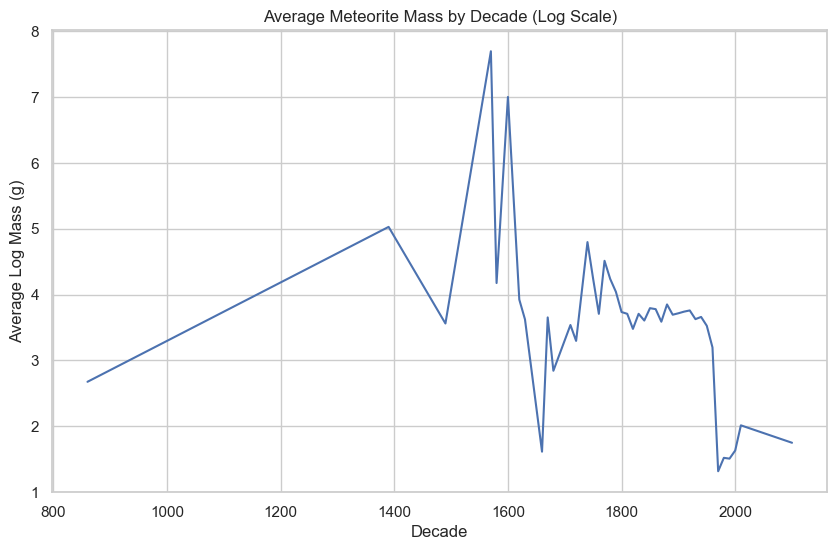

In [24]:
#Ho = There is No Change Between mass over Decades
#H1 = There is Change Between mass over Decades

df = df.copy()

df.loc[:, 'decade'] = (df['year'] // 10) * 10
df.loc[:, 'log_mass'] = np.log10(df['mass (g)'] + 1)

groups = [group['log_mass'].values for _, group in df.groupby('decade')]

f_stat, p_val_anova = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_val_anova:.4f}")

h_stat, p_val_kruskal = kruskal(*groups)
print(f"Kruskal-Wallis H-statistic: {h_stat:.3f}, p-value: {p_val_kruskal:.4f}")

if p_val_anova < 0.05:
    print("ANOVA: Significant difference in average mass across decades.\nReject Null Hypothesis")
else:
    print("ANOVA: No significant difference in average mass across decades.\nFail Reject Null Hypothesis")

if p_val_kruskal < 0.05:
    print("Kruskal-Wallis: Significant difference in mass distribution across decades. \nReject Null Hypothesis")
else:
    print("Kruskal-Wallis: No significant difference in mass distribution across decades. \nFail Reject Null Hypothesis")

# Plot average log mass by decade
decade_means = df.groupby('decade')['log_mass'].mean()

plt.figure(figsize=(10,6))
sns.lineplot(x=decade_means.index, y=decade_means.values)
plt.xlabel('Decade')
plt.ylabel('Average Log Mass (g)')
plt.title('Average Meteorite Mass by Decade (Log Scale)')
plt.show()


### So we can see our Second Hypothesis is also Proved

# Optional Machine Learning Model for this Analysis

In [ ]:
# Linear Model For mass and over the Year

In [25]:
df.loc[:, 'log_mass'] = np.log10(df['mass (g)'] + 1)

X = df[['year']]  
y = df['log_mass']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

r2 = model.score(X_test, y_test)
print(f"Model R² score: {r2:.2f}")

joblib.dump(model, 'meteorite_mass_Linearmodel.pkl')
print("Model saved as 'meteorite_mass_Linearmodel.pkl'")


Model R² score: 0.10
Model saved as 'meteorite_mass_Linearmodel.pkl'


In [ ]:
#  classify meteorites as “likely Fell” or “Found” based on mass.

In [26]:
X = df[['log_mass']]
y = df['fall']  # Target: "Fell" or "Found"

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

print(f"Model accuracy: {clf.score(X_test, y_test):.2f}")
joblib.dump(clf, 'meteorite_mass_Classify_model.pkl')
print("Model saved as 'meteorite_mass_Classify_model.pkl'")

Model accuracy: 0.96
Model saved as 'meteorite_mass_Classify_model.pkl'


# Testing Of our Models

In [27]:
# meteorite_mass_Linearmodel

model = joblib.load('meteorite_mass_Linearmodel.pkl')
new_data = pd.DataFrame({'year': [2025, 1990, 1850]})
predicted_log_mass = model.predict(new_data)
predicted_mass = (10 ** predicted_log_mass) - 1

# Combine into a readable DataFrame
results = new_data.copy()
results['predicted_log_mass'] = predicted_log_mass
results['predicted_mass_g'] = predicted_mass

print(results)

   year  predicted_log_mass  predicted_mass_g
0  2025            1.206842         15.100597
1  1990            1.672840         46.080363
2  1850            3.536831       3441.160097


In [28]:
# meteorite_mass_Classify_model
clf = joblib.load('meteorite_mass_Classify_model.pkl')
raw_masses = np.array([100, 5000, 20000])
log_masses = np.log10(raw_masses + 1)

new_data = pd.DataFrame({'log_mass': log_masses})
predicted_fall_status = clf.predict(new_data)

new_data['predicted_fall'] = predicted_fall_status
print(new_data)

   log_mass predicted_fall
0  2.004321          Found
1  3.699057           Fell
2  4.301052          Found


# Conclusion :
# As I thought, is meteor mining possible by mining those meteorites that have fallen on Earth? Most probably, NO.
# By getting data from NASA and using my data science knowledge, from what I learned from the data, the proportion of mass of meteorites that fell and were found on Earth is very small — not enough for industrial standard mining.
# That’s why meteorite mining on Earth makes more sense for R&D (Research and Development) rather than for industrial mining.
# Also, I learned new knowledge about hotspots where most meteorites fall, which is interesting for scientific research and future studies.